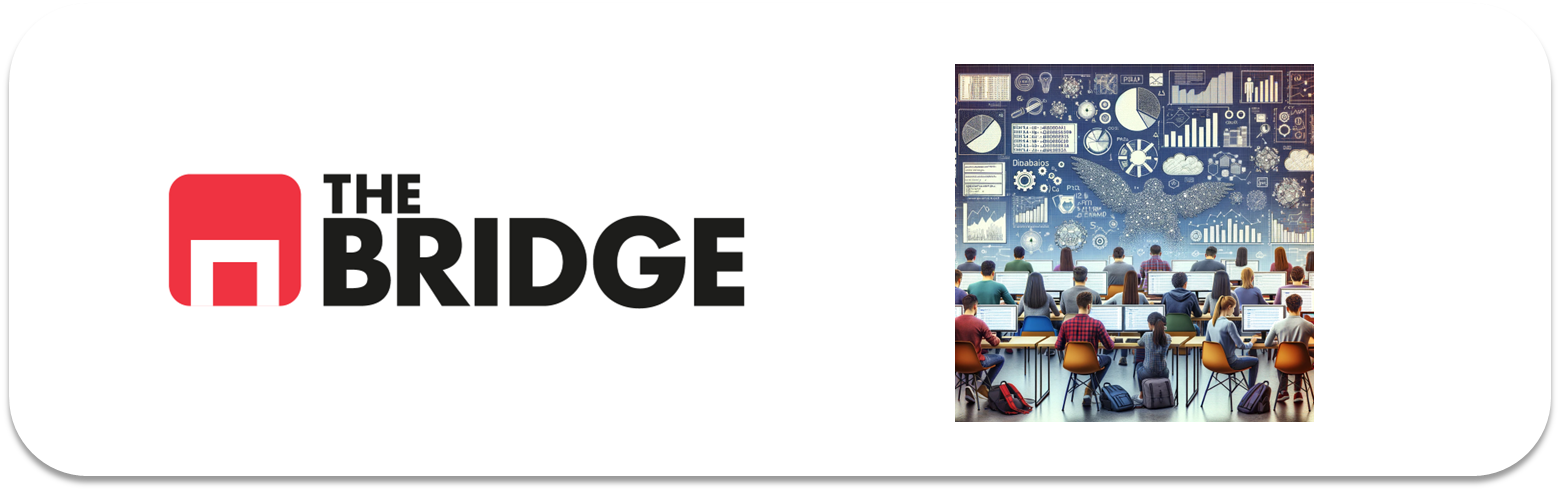

## PRACTICA OBLIGATORIA: **Clasificacion y Regresion Logistica**

* La práctica obligatoria de esta unidad consiste en modelar la supervivencia en el Titanic, por fin, además de una parte adicional multiclase. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import bootcampviztools as bt

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Indicaciones

A continuación tienes las indicaciones para hacer el modelado. No necesariamente tienes que seguirlos al pie de la letra, porque a partir de ahora ya las práctica obligatorias dejarán de ser mayormente guiadas por ejercicios y serán más de libre desarrollo, aunque con objetivos específicos, claros y determinados. 

En concreto se pide hacer un modelo de regresión logística, evaluarlo contra un dataset de test reservado del original mostrando las métricas propias de los problemas de clasificación, la matriz de confusión y la curva ROC. Además se pide comparar las predicciones con los valores reales y al final adaptar el modelo a un problema multiclase.

Los pasos para guiar el trabajo:
1. Carga el dataset del Titanic. 
2. Deshazte de las variables que no vayas a usar. Limpia lo que creas necesarios pero no hagas imputaciones.
3. Escoge y analiza la variable target de forma gráfica y razona sobre el impacto de la distribución en los resultados esperados. Ten en cuenta que lo que queremos es poder predecir si un pasajero sobrevivirá.
4. Haz el split en train y test que creas conveniente pero asegurándote que ambos conjuntos tienen un reparto similar de pasajeros embarcados en las tres ciudades.
5. Construye las parejas X,y de train y test.
6. Ahora sí imputa los nulos con medias y modas en la X de train. Guarda esas medias que necesitarás en la parte de test.
7. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.
8. Trata las variables para que funcionen lo mejor posible en el modelo.
9. Construye un modelo de regresión logística.
10. EXTRA: Analiza si lo crees conveniente los pesos y la importancia de las features.
11. Procesa el dataset de Test para que puedas usarlo en la evaluación 
12. Evalúa tu modelo contra el dataset de test y train. Obten las matrices de confusión y las métricas que creas adecuadas. Haz un pequeño assesment de su generabilidad.
13. EXTRA: Halla la probabilidad de supervivencia de un hombre de entre 30 y 40 años, que embarcó en Southampton en segunda clase, viajaba solo y no pagó el billete. PISTA: En este caso tendrás que calcular varias probabilidades y hacer la media de ellas.
14. EXTRA: Aprovecha todo el trabajo haciendo un único cambio en el target, ahora será la clase del viajero. Cambia el target quitándolo de X_train, X_test y añade a estos el target anterior. El resto no deberías cambiarlo. Entrena y evalua el modelo sólo con el classification_report.  



In [2]:

df = pd.read_csv("C:/Users/elena/local/ONLINE_DS_THEBRIDGE_ECN/Ejercicio_0/elena-prueba-nueva/titanic (3).csv")

In [3]:
df.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [6]:
target = "survived"

In [7]:

excluidas = ["embark_town", "alive", "class", "adult_male"]

In [ ]:
## SUPERVISAR DE DECK 

In [10]:
df["deck"].value_counts(dropna=False , normalize=True) #sacado del video

deck
NaN    0.772166
C      0.066218
B      0.052750
D      0.037037
E      0.035915
A      0.016835
F      0.014590
G      0.004489
Name: proportion, dtype: float64

In [11]:
df_deck = df.copy()
df_deck["deck"] = df_deck.deck.fillna("UNK") ## los ponemos como unk y rellenamos los nulos para no quitarlos.
#y asi no cambia los datos. lo hacemos en copy para no perderlo.
# o quizas podeamos descartarla. 

In [12]:
# excluidas = ["alive","embark_town","class"]
features_base = [col for col in df_deck.columns if col not in excluidas]
features_base.remove("deck")

features_base_deck = [col for col in df_deck.columns if col not in excluidas]

## ELiminamos las exlcuidas y por eso hacemos lo anterior. tenemos las feauteres base. 

In [19]:
#Estratificar respecto a la ciudad de embarque 

In [14]:
df_deck.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         891 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [17]:

df_deck["embarked"].value_counts(dropna=False, normalize=True) # lo podemos hacer sin normalize pero mejor asi. 

embarked
S      0.722783
C      0.188552
Q      0.086420
NaN    0.002245
Name: proportion, dtype: float64

In [20]:
df_deck = df_deck.dropna(subset="embarked")

In [22]:
df_deck.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     889 non-null    int64  
 1   pclass       889 non-null    int64  
 2   sex          889 non-null    object 
 3   age          712 non-null    float64
 4   sibsp        889 non-null    int64  
 5   parch        889 non-null    int64  
 6   fare         889 non-null    float64
 7   embarked     889 non-null    object 
 8   class        889 non-null    object 
 9   who          889 non-null    object 
 10  adult_male   889 non-null    bool   
 11  deck         889 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        889 non-null    object 
 14  alone        889 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 99.0+ KB


In [23]:
df_deck["embarked"].value_counts(dropna=False, normalize=True)

embarked
S    0.724409
C    0.188976
Q    0.086614
Name: proportion, dtype: float64

In [24]:
train_set, test_set = train_test_split(df_deck, test_size= 0.2, stratify= df_deck["embarked"], random_state= 42)

In [25]:
# Comprobamos estratificado en conjunto entrenamiento
train_set.embarked.value_counts(normalize= True)

embarked
S    0.724332
C    0.188467
Q    0.087201
Name: proportion, dtype: float64

In [26]:
# Comprobamos estratificado en conjunto entrenamiento
train_set.embarked.value_counts(normalize= True)

embarked
S    0.724332
C    0.188467
Q    0.087201
Name: proportion, dtype: float64

In [27]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 711 entries, 46 to 253
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     711 non-null    int64  
 1   pclass       711 non-null    int64  
 2   sex          711 non-null    object 
 3   age          573 non-null    float64
 4   sibsp        711 non-null    int64  
 5   parch        711 non-null    int64  
 6   fare         711 non-null    float64
 7   embarked     711 non-null    object 
 8   class        711 non-null    object 
 9   who          711 non-null    object 
 10  adult_male   711 non-null    bool   
 11  deck         711 non-null    object 
 12  embark_town  711 non-null    object 
 13  alive        711 non-null    object 
 14  alone        711 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 79.2+ KB


In [28]:
##MODELO PROPUESTO EN VIDEO :
# Elegimos la mediana no tanto por la distribución de edades sino para imputar variables discretas.

es_hombre = train_set.who == "man"
es_mujer = train_set.who == "woman"
es_child = train_set.who == "child"

median_man = train_set[es_hombre]["age"].median()
median_woman = train_set[es_mujer]["age"].median()
median_child = train_set[es_child]["age"].median()

es_nulo = train_set.age.isna()
es_nulo_test = test_set.age.isna()

#Imputamos en train
train_set.loc[es_hombre & es_nulo, "age"] = median_man
train_set.loc[es_mujer & es_nulo, "age"] = median_woman
train_set.loc[es_child & es_nulo, "age"] = median_child

#Imputamos en test
test_set.loc[(test_set.who == "man") & es_nulo_test, "age"] = median_man
test_set.loc[(test_set.who == "woman") & es_nulo_test, "age"] = median_woman
test_set.loc[(test_set.who == "child") & es_nulo_test, "age"] = median_child

In [29]:

test_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 178 entries, 223 to 142
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     178 non-null    int64  
 1   pclass       178 non-null    int64  
 2   sex          178 non-null    object 
 3   age          178 non-null    float64
 4   sibsp        178 non-null    int64  
 5   parch        178 non-null    int64  
 6   fare         178 non-null    float64
 7   embarked     178 non-null    object 
 8   class        178 non-null    object 
 9   who          178 non-null    object 
 10  adult_male   178 non-null    bool   
 11  deck         178 non-null    object 
 12  embark_town  178 non-null    object 
 13  alive        178 non-null    object 
 14  alone        178 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 19.8+ KB


In [30]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 711 entries, 46 to 253
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     711 non-null    int64  
 1   pclass       711 non-null    int64  
 2   sex          711 non-null    object 
 3   age          711 non-null    float64
 4   sibsp        711 non-null    int64  
 5   parch        711 non-null    int64  
 6   fare         711 non-null    float64
 7   embarked     711 non-null    object 
 8   class        711 non-null    object 
 9   who          711 non-null    object 
 10  adult_male   711 non-null    bool   
 11  deck         711 non-null    object 
 12  embark_town  711 non-null    object 
 13  alive        711 non-null    object 
 14  alone        711 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 79.2+ KB


In [ ]:
## miramos la distribución del target que es lo primero que se hace en las clasificaciones.

In [31]:
train_set[target].value_counts(normalize = True)

survived
0    0.618847
1    0.381153
Name: proportion, dtype: float64

In [32]:
# la variable objetivo la hemos guardado en la variable target
# entendemos como 0 que han fallecido y 1 que han sobrevivido
# 62% fallecio y el 38% sobrevivio por lo que vamos a buscar si están balanceados. (VIDEO)


In [33]:
features_base_deck

['survived',
 'pclass',
 'sex',
 'age',
 'sibsp',
 'parch',
 'fare',
 'embarked',
 'who',
 'deck',
 'alone']

In [34]:

train_set[features_base_deck].info()

<class 'pandas.core.frame.DataFrame'>
Index: 711 entries, 46 to 253
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  711 non-null    int64  
 1   pclass    711 non-null    int64  
 2   sex       711 non-null    object 
 3   age       711 non-null    float64
 4   sibsp     711 non-null    int64  
 5   parch     711 non-null    int64  
 6   fare      711 non-null    float64
 7   embarked  711 non-null    object 
 8   who       711 non-null    object 
 9   deck      711 non-null    object 
 10  alone     711 non-null    bool   
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 61.8+ KB


In [37]:
#vemos las numéricas #AYUDADO
features_num = ["age","sibsp","parch","fare"]

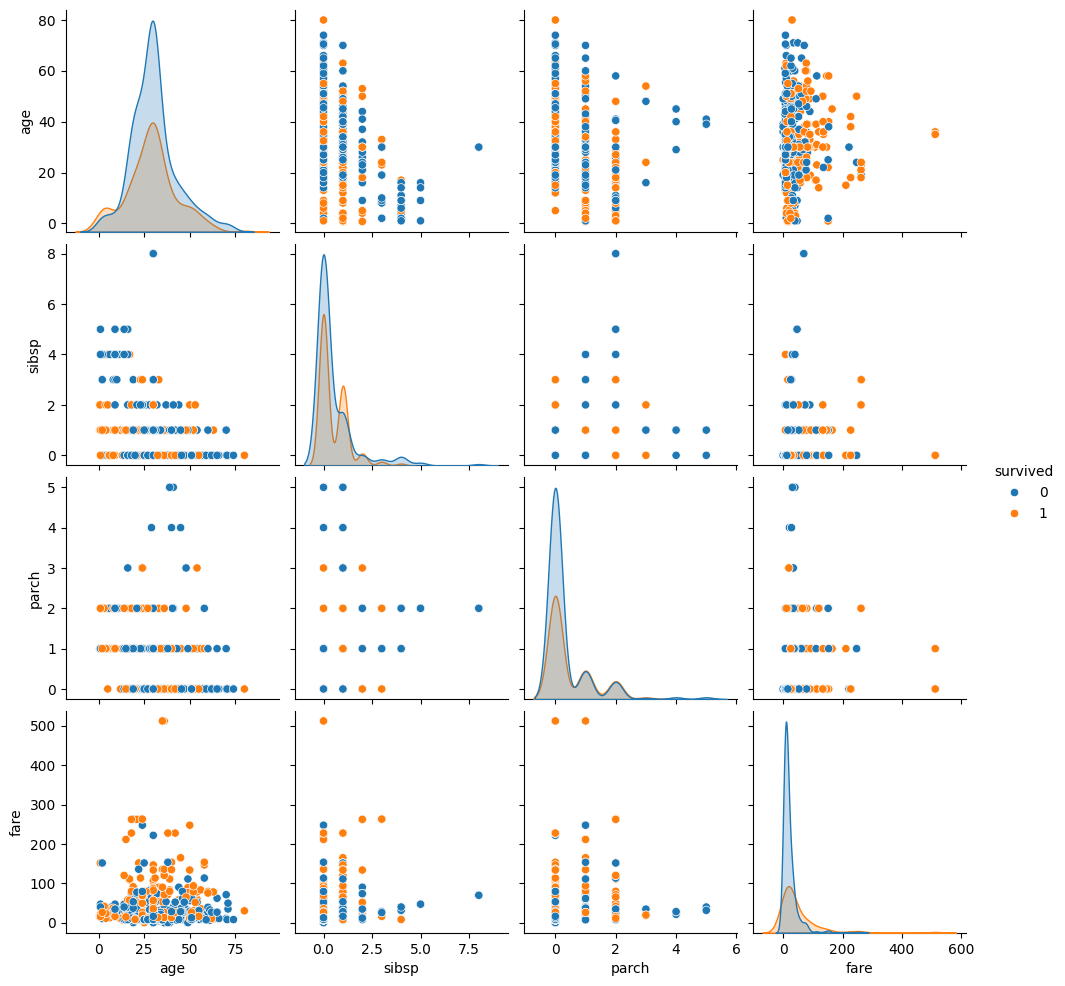

In [38]:
sns.pairplot(train_set[features_num + [target]], hue = target)

In [39]:
##  pairplot es lo que no vas mostrar con el hue (tono) lo divida por el target 
# en la diagonal nos dice como se comporta la variable y 
# despeus los de dispersion que podemos ver si hay alguna que se nos escapa.
# y por ejemplo vemos que tienen la misma forma

In [41]:
features_num = ["fare","age","sibsp"] # Descartamos "parch" porque no discrima entre clases de nuestro objetivo

In [42]:
# Análisis visual categóricas
features_cat = ["pclass","sex","embarked","alone","who","deck"]

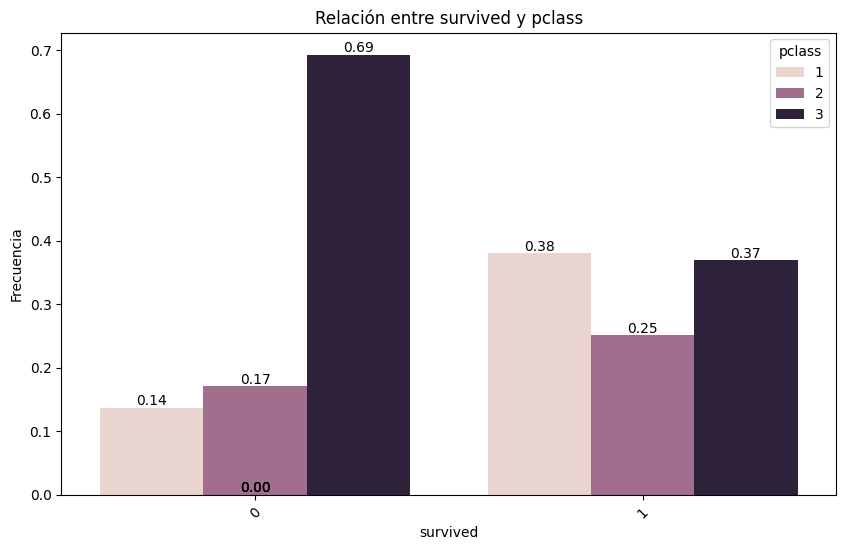

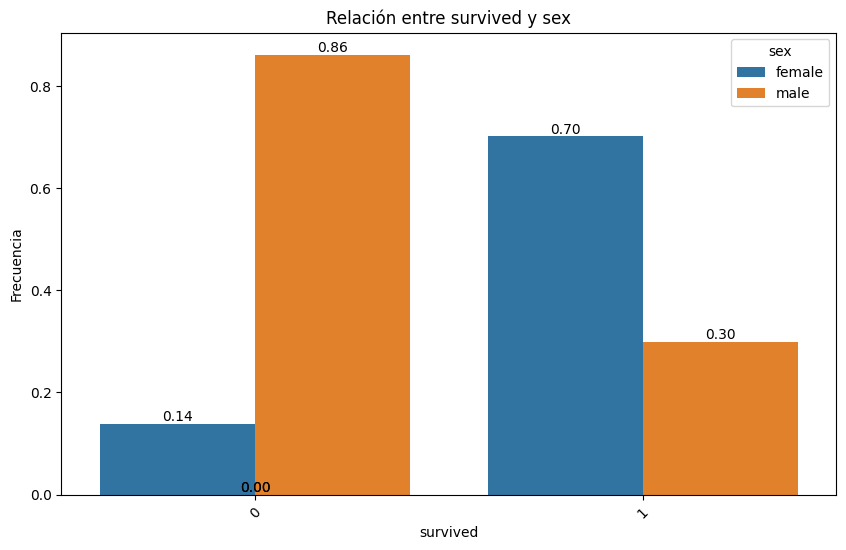

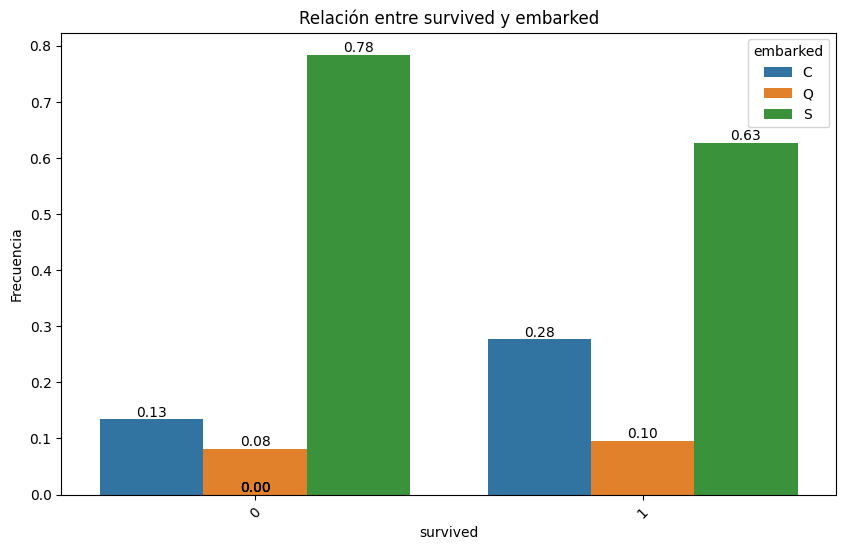

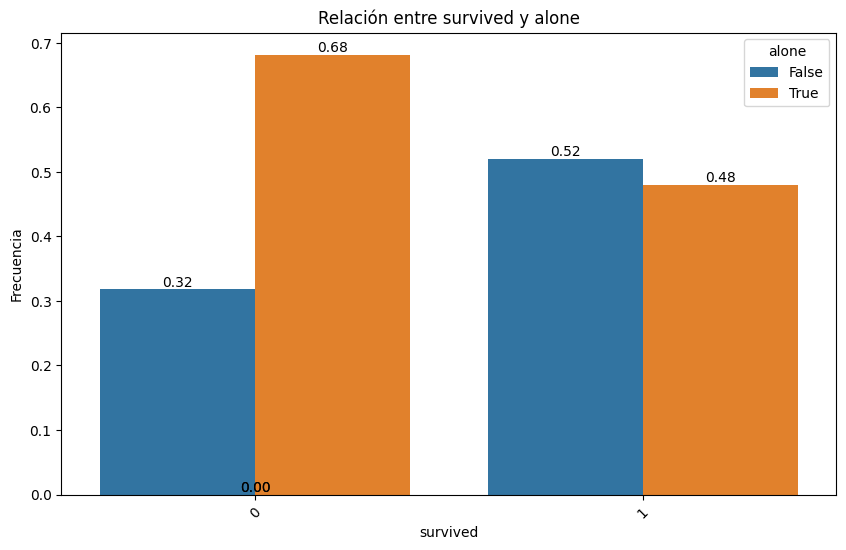

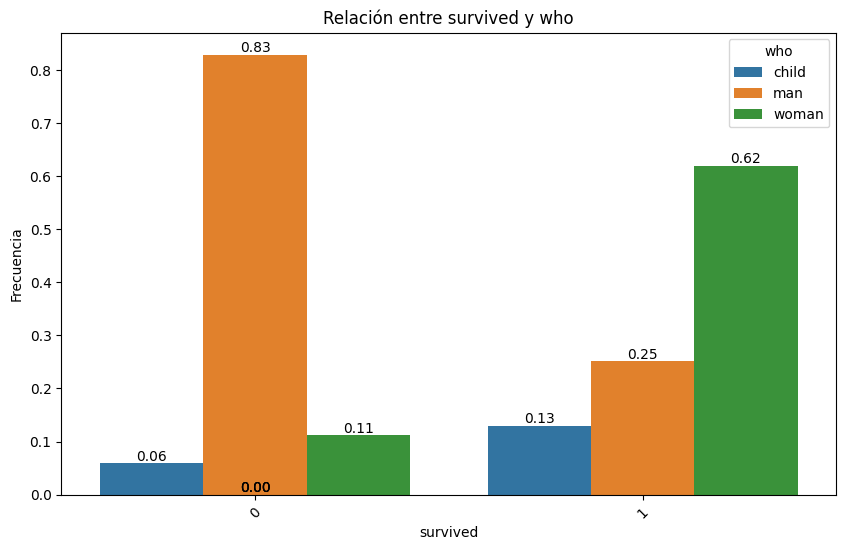

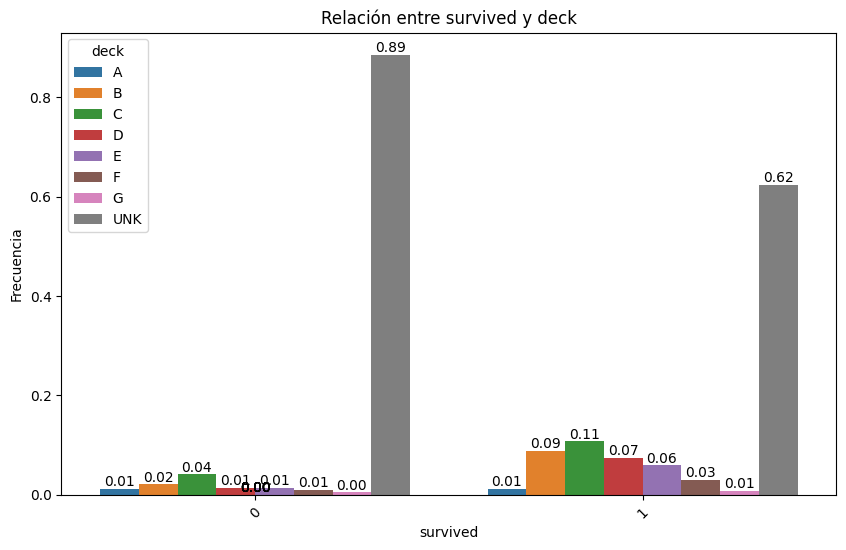

In [44]:
for feat in features_cat:
    bt.plot_categorical_relationship_fin(train_set, target, feat, show_values= True, relative_freq= True)

In [45]:

features_cat.remove("deck")
features_cat.append("deck_informed")

In [46]:
features_num

['fare', 'age', 'sibsp']

In [47]:
features_cat

['pclass', 'sex', 'embarked', 'alone', 'who', 'deck_informed']

In [48]:

from sklearn.preprocessing import OrdinalEncoder

In [49]:
categories = [["female","male"], ["S","C","Q"], ["child","woman","man"]] # Podemos darle este orden, otro o ninguno

encoder = OrdinalEncoder(categories= categories) #estas listas para las categorias

train_set[["sex","embarked","who"]] = encoder.fit_transform(train_set[["sex","embarked","who"]])
test_set[["sex","embarked","who"]] = encoder.transform(test_set[["sex","embarked","who"]])

In [50]:

train_set[["sex","embarked","who"]]

sex  embarked  who
46   1.0       2.0  2.0
230  0.0       0.0  1.0
657  0.0       2.0  1.0
888  0.0       0.0  1.0
809  0.0       0.0  1.0
..   ...       ...  ...
222  1.0       0.0  2.0
167  0.0       0.0  1.0
123  0.0       0.0  1.0
150  1.0       0.0  2.0
253  1.0       0.0  2.0

[711 rows x 3 columns]

array([[<Axes: title={'center': 'fare'}>,
        <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'sibsp'}>, <Axes: >]], dtype=object)

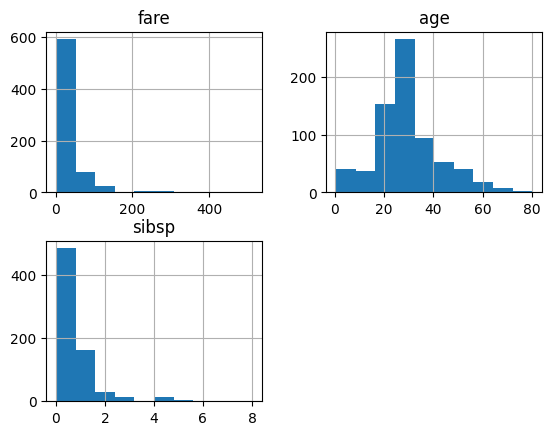

In [51]:
train_set[features_num].hist() #para las numericas

In [ ]:
# Aplicamos logaritmo a fare, se rompe porque hay valores 0 
(train_set["fare"]+1).apply(np.log).hist()

#sacado 

<Axes: >

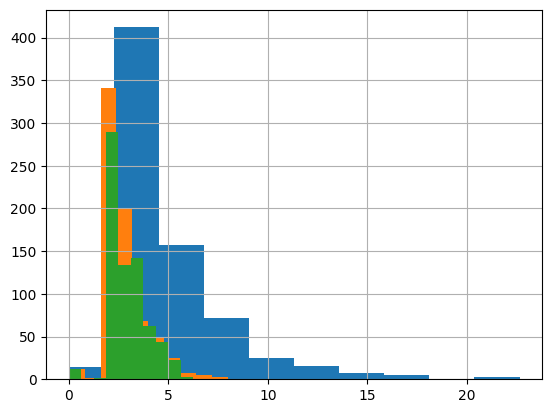

In [52]:
np.sqrt(train_set["fare"]).hist() # Azul
np.cbrt(train_set["fare"]).hist() # Naranja
np.log1p(train_set["fare"]).hist() # Verde

<Axes: >

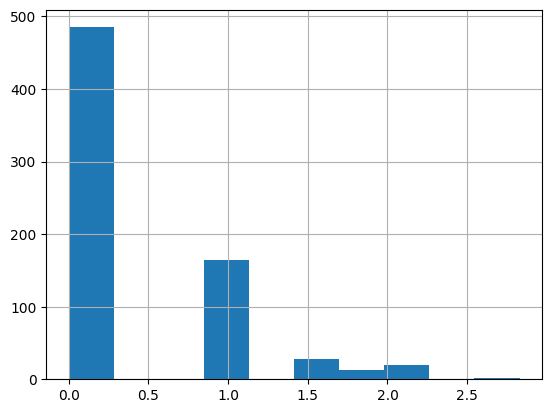

In [53]:

train_set["sibsp"].apply(np.sqrt).hist()

<Axes: >

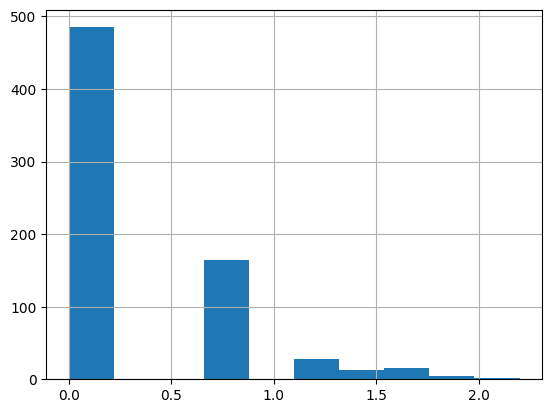

In [54]:
np.log(train_set["sibsp"]+1).hist() #recomienda tener un orden 

In [55]:
# Aplicaremos raíz cuadrada a train y test
train_set["fare"] = np.sqrt(train_set["fare"])
test_set["fare"] = np.sqrt(test_set["fare"])

# train_set["sibsp"] = np.sqrt(train_set["sibsp"])
# test_set["sibsp"] = np.sqrt(test_set["sibsp"])

In [56]:

train_set

survived  pclass  sex   age  sibsp  parch      fare  embarked   class  \
46          0       3  1.0  30.0      1      0  3.937004       2.0   Third   
230         1       1  0.0  35.0      1      0  9.136465       0.0   First   
657         0       3  0.0  32.0      1      1  3.937004       2.0   Third   
888         0       3  0.0  30.0      1      2  4.842520       0.0   Third   
809         1       1  0.0  33.0      1      0  7.286975       0.0   First   
..        ...     ...  ...   ...    ...    ...       ...       ...     ...   
222         0       3  1.0  51.0      0      0  2.837252       0.0   Third   
167         0       3  0.0  45.0      1      4  5.282045       0.0   Third   
123         1       2  0.0  32.5      0      0  3.605551       0.0  Second   
150         0       2  1.0  51.0      0      0  3.539068       0.0  Second   
253         0       3  1.0  30.0      1      0  4.012481       0.0   Third   

     who  adult_male deck  embark_town alive  alone  
46   2.0        True  UNK   Queenstown    no  False  
230  1.0       False    C  Southampton   yes  False  
657  1.0       False  UNK   Queenstown    no  False  
888  1.0       False  UNK  Southampton    no  False  
809  1.0       False    E  Southampton   yes  False  
..   ...         ...  ...          ...   ...    ...  
222  2.0        True  UNK  Southampton    no   True  
167  1.0       False  UNK  Southampton    no  False  
123  1.0       False    E  Southampton   yes   True  
150  2.0        True  UNK  Southampton    no   True  
253  2.0        True  UNK  Southampton    no  False  

[711 rows x 15 columns]

In [58]:
# para pdoer escalar las numericas.

In [60]:

scaler = StandardScaler() #recomendado

In [61]:
train_set[features_num] = scaler.fit_transform(train_set[features_num])

In [62]:

test_set[features_num] = scaler.transform(test_set[features_num])

In [63]:

train_set[features_num].describe()

fare           age         sibsp
count  7.110000e+02  7.110000e+02  7.110000e+02
mean   2.748231e-17  9.993569e-17 -3.497749e-17
std    1.000704e+00  1.000704e+00  1.000704e+00
min   -1.616518e+00 -2.232200e+00 -5.091491e-01
25%   -6.670619e-01 -5.958321e-01 -5.091491e-01
50%   -3.522452e-01  1.790165e-02 -5.091491e-01
75%    2.429585e-01  4.014852e-01  5.105833e-01
max    6.031542e+00  3.853737e+00  7.648711e+00

In [64]:

test_set[features_num].describe()

fare         age       sibsp
count  178.000000  178.000000  178.000000
mean     0.097663   -0.020422    0.126751
std      0.967723    0.974226    1.524850
min     -1.616518   -2.251379   -0.509149
25%     -0.657836   -0.442399   -0.509149
50%     -0.199008    0.017902   -0.509149
75%      0.428358    0.401485    0.510583
max      3.863155    2.702987    7.648711

In [65]:
train_set

survived  pclass  sex       age     sibsp  parch      fare  embarked  \
46          0       3  1.0  0.017902  0.510583      0 -0.286239       2.0   
230         1       1  0.0  0.401485  0.510583      0  1.470612       0.0   
657         0       3  0.0  0.171335  0.510583      1 -0.286239       2.0   
888         0       3  0.0  0.017902  0.510583      2  0.019727       0.0   
809         1       1  0.0  0.248052  0.510583      0  0.845686       0.0   
..        ...     ...  ...       ...       ...    ...       ...       ...   
222         0       3  1.0  1.628953 -0.509149      0 -0.657836       0.0   
167         0       3  0.0  1.168652  0.510583      4  0.168238       0.0   
123         1       2  0.0  0.209693 -0.509149      0 -0.398234       0.0   
150         0       2  1.0  1.628953 -0.509149      0 -0.420698       0.0   
253         0       3  1.0  0.017902  0.510583      0 -0.260736       0.0   

      class  who  adult_male deck  embark_town alive  alone  
46    Third  2.0        True  UNK   Queenstown    no  False  
230   First  1.0       False    C  Southampton   yes  False  
657   Third  1.0       False  UNK   Queenstown    no  False  
888   Third  1.0       False  UNK  Southampton    no  False  
809   First  1.0       False    E  Southampton   yes  False  
..      ...  ...         ...  ...          ...   ...    ...  
222   Third  2.0        True  UNK  Southampton    no   True  
167   Third  1.0       False  UNK  Southampton    no  False  
123  Second  1.0       False    E  Southampton   yes   True  
150  Second  2.0        True  UNK  Southampton    no   True  
253   Third  2.0        True  UNK  Southampton    no  False  

[711 rows x 15 columns]

In [66]:

features_set_cat_1 = ["pclass","who"] # set de categóricas 1
features_set_cat_2 = features_cat # set de categóricas 2

In [67]:

features_set_cat_1

['pclass', 'who']

In [68]:

features_set_cat_2

['pclass', 'sex', 'embarked', 'alone', 'who', 'deck_informed']

In [69]:

features_num

['fare', 'age', 'sibsp']

In [70]:
## modelado

In [71]:

X_train = train_set[features_set_cat_1]
y_train = train_set[target]
#y seria el target
X_test = test_set[features_set_cat_1]
y_test = test_set[target]

In [72]:

log_class_1 = LogisticRegression(max_iter = 10000) # Hiperparámetros

log_class_1.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [ ]:
# para poder hacer esto 100 es el numero maximo de interacciones que tiene como marcadp
# no nos va dar correcto habria que poner el 1000 para que de mas ajustado y podemos hacer prediccciones

In [73]:
# Muy importante, entender las métricas en función del tipo de problema:
# Métricas de regresión (MAE, MSE, RMSE, MAPE, R^2)
# Métricas de clasificación (accuracy, precision, recall, f1-score, auroc)

In [79]:
def metrics_titanic(model, X, y_target):
    y_pred = model.predict(X)
    ConfusionMatrixDisplay.from_predictions(y_target, y_pred)
    print(classification_report(y_target, y_pred))

    #matrices de confusion para poder tener medir con exactitud entre valores predichos y reales 

              precision    recall  f1-score   support

           0       0.78      0.93      0.85       440
           1       0.84      0.58      0.68       271

    accuracy                           0.80       711
   macro avg       0.81      0.75      0.77       711
weighted avg       0.80      0.80      0.79       711



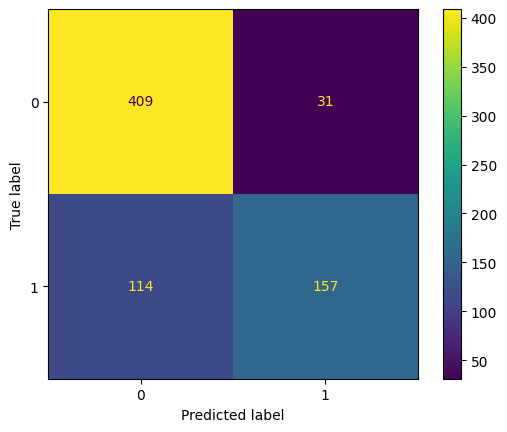

In [76]:
### train metrics
metrics_titanic(log_class_1, X_train, y_train)

              precision    recall  f1-score   support

           0       0.77      0.90      0.83       109
           1       0.78      0.57      0.66        69

    accuracy                           0.77       178
   macro avg       0.77      0.73      0.74       178
weighted avg       0.77      0.77      0.76       178



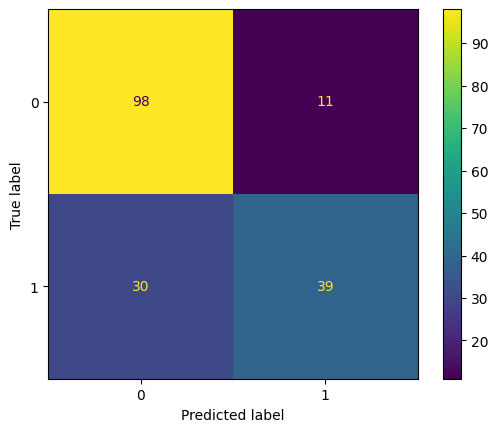

In [77]:
### test_metrics
metrics_titanic(log_class_1, X_test, y_test)

AUROC: 0.83


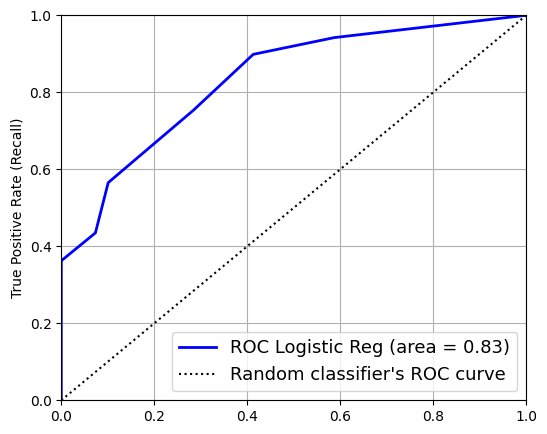

In [78]:
### Usando matplotlib
from sklearn.metrics import roc_curve, auc
scores = log_class_1.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, scores[:,1])
roc_auc = auc(fpr,tpr)
print("AUROC: %.2f" %(roc_auc))
plt.figure(figsize=(6, 5))  
plt.plot(fpr, tpr, linewidth=2, color= "blue", label=f"ROC Logistic Reg (area = {roc_auc:0.2f})")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)
plt.show()

In [ ]:
train_set

In [ ]:

train_set.columns.to_list() == test_set.columns.to_list()

In [ ]:
X_train = train_set[features_set_cat_2]
y_train = train_set[target]

X_test = test_set[features_set_cat_2]
y_test = test_set[target]

In [ ]:
log_class_2 = LogisticRegression(max_iter = 10000)

log_class_2.fit(X_train, y_train)

In [ ]:
# for col in X_train.columns:
#     if col not in test_set:
#         test_set[col] = 0

# X_train = train_set[features_set_cat_2]
# y_train = train_set[target]
# X_test = test_set[features_set_cat_2]
# y_test = test_set[target]

# log_class_2 = LogisticRegression(max_iter = 10000)
# log_class_2.fit(X_train, y_train)

In [ ]:

metrics_titanic(log_class_2, X_train,y_train)

In [ ]:

### test_metrics
metrics_titanic(log_class_2, X_test, y_test)

In [ ]:
### Usando matplotlib
from sklearn.metrics import roc_curve, auc
scores = log_class_2.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, scores[:,1])
roc_auc = auc(fpr,tpr)
print("AUROC: %.2f" %(roc_auc))
plt.figure(figsize=(6, 5))  
plt.plot(fpr, tpr, linewidth=2, color= "blue", label=f"ROC Logistic Reg (area = {roc_auc:0.2f})")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)
plt.show()

In [ ]:
### Con numéricas

X_train = train_set[features_set_cat_2 + features_num]
y_train = train_set[target]
X_test = test_set[features_set_cat_2 + features_num]
y_test = test_set[target]

log_class_3 = LogisticRegression(max_iter = 10000)

log_class_3.fit(X_train, y_train)

In [ ]:
metrics_titanic(log_class_3, X_train, y_train)

In [ ]:
metrics_titanic(log_class_3, X_test, y_test)

In [ ]:
### Usando matplotlib
from sklearn.metrics import roc_curve, auc
scores = log_class_3.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, scores[:,1])
roc_auc = auc(fpr,tpr)
print("AUROC: %.2f" %(roc_auc))
plt.figure(figsize=(6, 5))  
plt.plot(fpr, tpr, linewidth=2, color= "blue", label=f"ROC Logistic Reg (area = {roc_auc:0.2f})")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)
plt.show()

In [ ]:
features_set_cat_2 + features_num

In [ ]:
data_base = {
    "pclass": 2,
    "embarked": 0,
    "alone": True,
    "fare": 0,
    "who":2,
    "deck_informed": 0,
    "sibsp": 0,
    "sex": 0
}

probs = []
for age in range(30,41):
    data = data_base.copy()
    data["age"] = age
    X_man = pd.DataFrame([data])
    X_man[features_num] = scaler.transform(X_man[features_num])
    print(X_man)
    prob_dead, prob_surv = log_class_3.predict_proba(X_man[features_set_cat_2 + features_num])[0]
    probs.append(prob_surv)
    
print("Prob media de sobrevivir:", np.mean(probs))